# Kelly's betting strategy

Code copyright (c) Pietro Vischia, 2020

The concept for this example is based on "Surprises in Probability" by Henk Tijms (CRC Press, 2019)

### The investing framework

At the beginning of the year you are given an amount of money ```initial_capital``` and access to the stock market.

Every Monday, you can choose an amount of money to invest in one stock company.
Every Friday, you must sell the stock you acquired, and the following Monday you can buy other stock.

Suppose that the condition of the market is such that the probability that each week the chosen stock increments its value is ```p_increase``` (and the probability that it looses its value is therefore ```1-p_increase```).

To fix the ideas, let's say that there is a 50%-50% chance that the stock gains or loses value over the week.
Let's also suppose that when the stock increases its value, it does so by 80%, and that when it looses value it does so by 40%.

What's the best investment strategy?

In [108]:
import random
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

nweeks=52 # weeks per year
initial_capital=10000


font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }


# Weekly probabilities
p_increase=0.5
increase=0.8
# p_decrease=0.5 # of decreasing by 60%
decrease=0.6

def invest(money):
    r=random.uniform(0,1)
    return money*(1+increase) if (r>p_increase) else money*(1-decrease)


### The average return

The condition of the market seems favourable to us: although there is a 50%-50% weekly probability of increasing/decreasing stock value, the expected gain (80%) is larger than the expected loss (60%).

If we compute the average variation in value of the stock for this market, using the simple form $\sum_i p_i\times g_i$, where $g_i$ is the expected gain,
we obtain an average variation per week of $0.8\times0.5 - 0.6\times0.5 = 0.1$, i.e. a nice average weekly increase in value of 10%


### First betting strategy: invest the full amount every week

Given this favourable market situation, we can think of investing every week our entire starting capital, say 10000 euro.


**Question 1:** If I bet each week the whole capital, after one year I will most likely:
- Have a couple euros (dramatically loose)
- Have about  10k euros (neither win nor lose)
- Have about 11000 euros (average 10% return of the market)
- Will have gained 100k euro or more (dramatically win)

Time for a poll! (go to mentimeter)

If you are doing this exercise on your own, try to answer honestly and then proceed to find out if you were right!


In [2]:
# Strategy 1: invest the full amount every week

def all_in(money):
    capital=money
    # Simulate the year
    for i in range(nweeks):
        capital=invest(capital) # every time I invest the full capital
    return capital
    


In [88]:
# Run toys for strategy 1
results=[]
for _ in range(1000000):
    results.append(all_in(initial_capital)/initial_capital)

results=np.array(results)
    

Text(6.5, 0.4, 'Maintain or gain money\n 6.3%')

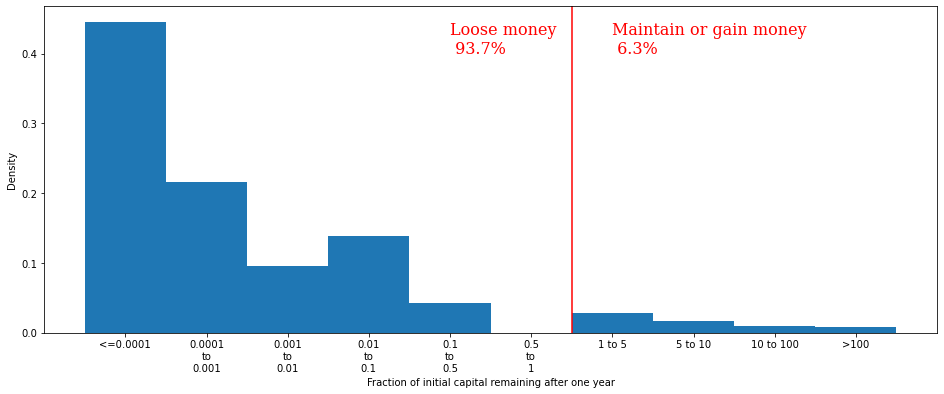

In [106]:
def categorize(x):
    if x<=0.0001:
        return 0
    if x<=0.001:
        return 1
    if x<=0.01:
        return 2
    if x<=0.1:
        return 3
    if x<=0.5:
        return 4
    if x<=1.:
        return 5
    if x<=5:
        return 6
    if x<=10:
        return 7
    if x<=100:
        return 8
    return 9


conv_results=[categorize(x) for x in results]

xticks_labels=["<=0.0001", 
               "0.0001\nto\n0.001",
               "0.001\nto\n0.01",
               "0.01\nto\n0.1",
               "0.1\nto\n0.5",
               "0.5\nto\n1",
               "1 to 5",
               "5 to 10",
               "10 to 100",
               ">100"
              ]
fig = plt.figure(figsize=(16,6))
n, bins, patches = plt.hist(conv_results, bins=np.linspace(0,10,11),density=True)    
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)
plt.axvline(x=6, ymin=0, ymax=1, c='red')
plt.xlabel("Fraction of initial capital remaining after one year")
plt.ylabel("Density")
plt.text(4.5, 0.4, "Loose money\n %02.1f%%"%(100*(results< 1).sum()/len(results) ), c='red',fontdict=font)
plt.text(6.5, 0.4, "Maintain or gain money\n %02.1f%%"%(100*(results>=1).sum()/len(results) ), c='red', fontdict=font)

#plt.yscale("log")

### Think in probabilities!

The average weekly increase in stock is indeed 10%.

However, if you think in probabilities: given a ```p_increase=0.5```, the most likely outcome is that 50% of the times the stock will loose its value and 50% of the times it will gain value.

Over 52 weeks, this will imply a final capital of:
$1.8^{26}\times0.4^{26}\times10000 = 1.95$ euro

And from toys we have seen that we will loose money a staggering 94% of the times, almost 50% of the times will remain with only a couple euro in hand, and will maintain or gain money only 6% of the times!



In [109]:
# Strategy 2: 
def all_in(money):
    capital=money
    # Simulate the year
    for i in range(nweeks):
        capital=invest(capital) # every time I invest the full capital
    return capital
    
    
    